# Week 4, Wed, 4/23

In [ ]:
import numpy as np
import pandas as pd

# A synthetic dataset

N = 100
X = np.random.rand(N,2)
# y = 1 + 2 x_1 + 3 x_2
y = 1 + 2*X[:,0] + 3*X[:,1] + np.random.normal(0,0.1,N)

df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'y':y})



In [4]:
df

X1        X2         y
0   0.863820  0.260710  3.629063
1   0.826831  0.454714  3.948601
2   0.123193  0.188948  1.850269
3   0.780613  0.610546  4.444845
4   0.012375  0.840044  3.566947
..       ...       ...       ...
95  0.999957  0.201042  3.696460
96  0.322909  0.589567  3.389103
97  0.624948  0.523743  3.934405
98  0.350681  0.180042  2.280561
99  0.849586  0.709870  4.762332

[100 rows x 3 columns]

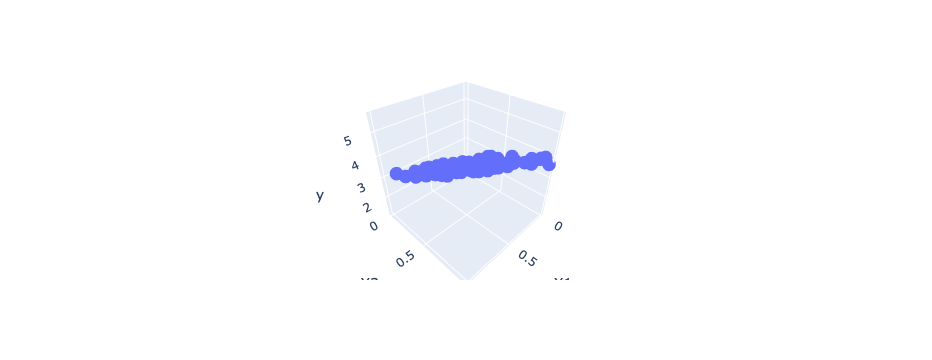

In [5]:
import plotly.graph_objs as go
import plotly.express as px

# Create 3D scatter plot
fig = px.scatter_3d(df, x='X1', y='X2', z='y')

# Show interactive plot
fig.show()

Text(0, 0.5, 'X2')

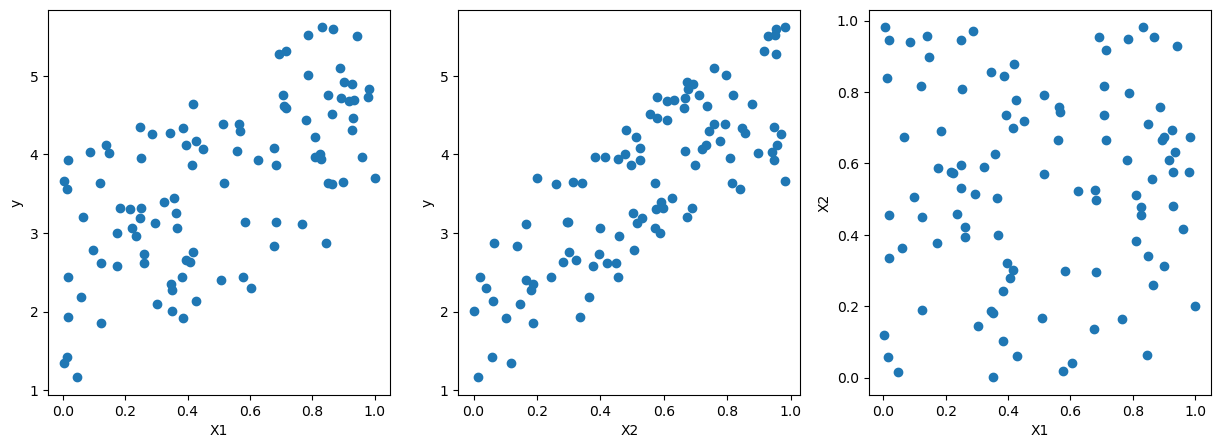

In [6]:
import matplotlib.pyplot as plt

# pairwise scatter plot of X1, X2, y
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(X[:,0],y)
ax[0].set_xlabel('X1')
ax[0].set_ylabel('y')

ax[1].scatter(X[:,1],y)
ax[1].set_xlabel('X2')
ax[1].set_ylabel('y')

ax[2].scatter(X[:,0],X[:,1])
ax[2].set_xlabel('X1')
ax[2].set_ylabel('X2')

In [7]:
from sklearn import linear_model

lreg_sklearn = linear_model.LinearRegression()

lreg_sklearn.fit(X,y) 

LinearRegression()

In [8]:
print(lreg_sklearn.intercept_, lreg_sklearn.coef_)

1.0535067030741847 [1.99274839 2.92111383]


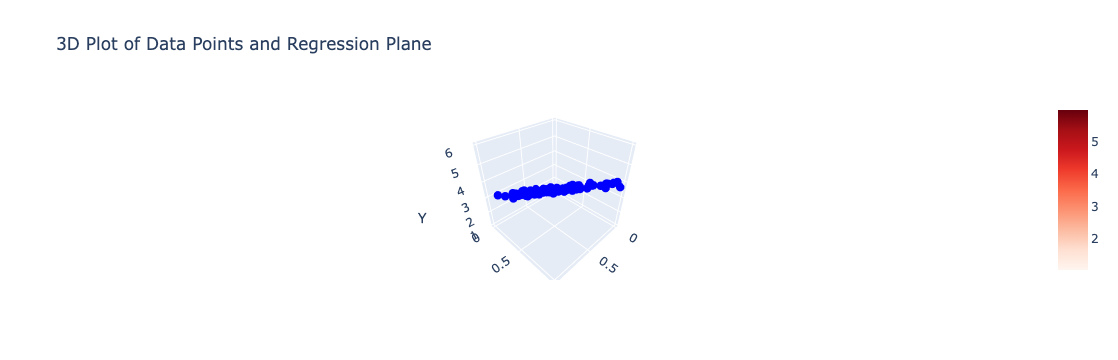

In [9]:
# Assuming coefficients and intercept from the sklearn linear regression model
coefficients = lreg_sklearn.coef_
intercept = lreg_sklearn.intercept_

# Create meshgrid for the regression plane
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz = coefficients[0] * xx + coefficients[1] * yy + intercept

# Create the scatter plot for the data points
scatter = go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Create the surface plot for the regression plane
surface = go.Surface(
    x=xx,
    y=yy,
    z=zz,
    colorscale='reds',
    opacity=0.5,
    name='Regression Plane'
)

# Create the layout
layout = go.Layout(
    title='3D Plot of Data Points and Regression Plane',
    scene=dict(
        xaxis_title='X_1',
        yaxis_title='X_2',
        zaxis_title='Y'
    )
)

# Combine the scatter and surface plots
fig = go.Figure(data=[scatter, surface], layout=layout)

# Show the plot
fig.show()

In [18]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df



species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

In [19]:
X = df[['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm']]
X

bill_length_mm  bill_depth_mm  flipper_length_mm
0              39.1           18.7              181.0
1              39.5           17.4              186.0
2              40.3           18.0              195.0
4              36.7           19.3              193.0
5              39.3           20.6              190.0
..              ...            ...                ...
338            47.2           13.7              214.0
340            46.8           14.3              215.0
341            50.4           15.7              222.0
342            45.2           14.8              212.0
343            49.9           16.1              213.0

[333 rows x 3 columns]

In [21]:
y =  df['body_mass_g']

In [22]:
y

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 333, dtype: float64

In [23]:
lreg_sklearn = linear_model.LinearRegression()


In [24]:
lreg_sklearn.fit(X,y)

LinearRegression()

In [26]:
lreg_sklearn.score(X,y)

0.7639366781169294

# Colinearity 

If two variables are highly correlated, intuitively, we can say that they are measuring the same thing. In the context of linear regression, this is called multicollinearity.

Suppose $Y = aX_1$ and $X_2 = bX_1$, then we can write $Y = \beta_1 X_1 + \beta_2 X_2$ for any $\beta_1$  and $\beta_2$ such that $\beta_1 + b \beta_2 = a$.

We can see that the coefficients are not unique. 

This cause a few problems:

1. **Interpretation**: it's difficult to interpret the coefficients. Originally, we would say that a one unit increase in $X_1$ would lead to a $\beta_1$ increase in $Y$. But now, we can't say that, because we can't change $X_1$ without changing $X_2$.

2. **Large Variance of the parameter**: Since there could be infinite solutions, there is no guarantee which one the solver will find. Therefore small changes in the data could lead to large changes in the coefficients.

3. **Numerical Stability**: Sometimes the solver can't find the solution.

However, this does not affect the prediction: even though the coefficients are not unique, the prediction will be the same.

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression


X = np.random.uniform(0,1,(100,1))
X = np.column_stack((X, X[:,0]*2))
y = X[:,0] + np.random.randn(X.shape[0]) * 0.1

# regression with X0 and X1
lreg_sklearn = LinearRegression()
lreg_sklearn.fit(X,y)
score = lreg_sklearn.score(X,y)
print(f'coefs using X0 and X1: {lreg_sklearn.coef_}, intercept: {lreg_sklearn.intercept_}, score: {score}')


# regression with X0
lreg_sklearn.fit(X[:,0:1],y)
score = lreg_sklearn.score(X[:,0:1],y)
print(f'coefs using X0: {lreg_sklearn.coef_}, intercept: {lreg_sklearn.intercept_}, score: {score}')

coefs using X0 and X1: [0.19438571 0.38877142], intercept: 0.013947482462746907, score: 0.879023539153949
coefs using X0: [0.97192856], intercept: 0.013947482462746963, score: 0.879023539153949
